# Identifying SVGs on hippocampus data using SINFONIA

The following tutorial demonstrates how to use SINFONIA for identifying spatially variable genes (SVGs) on a mouse hippocampus dataset ([Stickels, et al., 2021](https://www.nature.com/articles/s41587-020-0739-1)).

There are two parts in this tutorial:

- **Integrating SINFONIA into SCANPY.** This part will show you how to seamlessly integrate SINFONIA into the SCANPY vignette for spatial transcriptomic data.
- **Evaluating the performance for deciphering spatial domain.** This part will show you how to evaluate the performance of identified SVGs for deciphering spatial domain, and reproduce the results in the manuscript of SINFONIA.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import sinfonia
import warnings
warnings.filterwarnings("ignore")

On a unix system, you can uncomment and execute the following command to download the hippocampus dataset in AnnData format.

In [2]:
# !wget https://health.tsinghua.edu.cn/software/sinfonia/data/SlideSeqV2_Hippocampus.h5ad

In [3]:
Hippocampus = sc.read('SlideSeqV2_Hippocampus.h5ad')
Hippocampus

AnnData object with n_obs × n_vars = 53208 × 23264
    obsm: 'spatial'

## Integrating SINFONIA into SCANPY

First, we set a random seed for reproducibility.

In [4]:
sinfonia.setup_seed(2022)

We then follow [the SCANPY vignette](https://scanpy-tutorials.readthedocs.io/en/latest/spatial/basic-analysis.html) for spatial transcriptomic data to process the hippocampus dataset. In order to avoid subjective factors in quality control, we start from the count matrix.

We filter out the genes with zero counts, normalize and logarithmize the data.

In [5]:
adata = Hippocampus.copy()
sc.pp.filter_genes(adata, min_cells=1)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

Next, we detect SVGs via SINFONIA with the same `n_top_genes` as in the SCANPY vignette.

In [6]:
adata = sinfonia.spatially_variable_genes(adata, n_top_genes=2000, subset=True)

The mode used to identify SVGs is stored in `adata.uns['svg']`. Boolean indicators of SVGs are stored in `adata.var['spatially_variable']`. Moran’s I scores of all the genes are stored in `adata.var['moranI']`, while rescaled Geary’s C scores of all the genes are stored in `adata.var['gearyC']`.

In [7]:
adata

View of AnnData object with n_obs × n_vars = 53208 × 3620
    var: 'n_cells', 'spatially_variable', 'moranI', 'gearyC'
    uns: 'log1p', 'svg'
    obsm: 'spatial'

We then embed and cluster the manifold encoded by transcriptional similarity.

In [8]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.louvain(adata, key_added="default_louvain")
sc.tl.leiden(adata, key_added="default_leiden")

## Evaluating the performance for deciphering spatial domain

Since this dataset does not come with spatial domain annotations, we evaluate the performance for spot visualization with the clustering results.

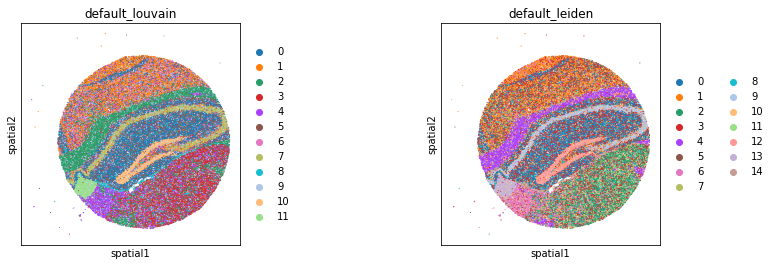

In [9]:
sc.pl.spatial(adata, color=['default_louvain','default_leiden'], spot_size=30)